In [1]:
%matplotlib inline

In [2]:
# Import dependencies
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress
import os
from scipy import stats

In [3]:
# Load in file
file_path = os.path.join(os.getcwd(),'Resources', 'tracks.csv')
tracks_df = pd.read_csv(file_path)
tracks_df.head()

,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.7440,0.151,0.127,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.0000,0.148,0.655,102.009,1
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.0218,0.212,0.457,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.9180,0.104,0.397,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.1300,0.311,0.196,103.220,4


In [4]:
# Clean and format data 
clean_df = tracks_df[['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists', 'release_date', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness',
'liveness', 'valence', 'tempo']]
clean_df.head()

,id,name,popularity,duration_ms,explicit,artists,release_date,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,35iwgR4jXetI318WEWsa1Q,Carve,6,126903,0,['Uli'],1922-02-22,0.645,0.4450,-13.338,0.4510,0.674,0.7440,0.151,0.127,104.851
1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,98200,0,['Fernando Pessoa'],1922-06-01,0.695,0.2630,-22.136,0.9570,0.797,0.0000,0.148,0.655,102.009
2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,181640,0,['Ignacio Corsini'],1922-03-21,0.434,0.1770,-21.180,0.0512,0.994,0.0218,0.212,0.457,130.418
3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,176907,0,['Ignacio Corsini'],1922-03-21,0.321,0.0946,-27.961,0.0504,0.995,0.9180,0.104,0.397,169.980
4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,163080,0,['Dick Haymes'],1922,0.402,0.1580,-16.900,0.0390,0.989,0.1300,0.311,0.196,103.220


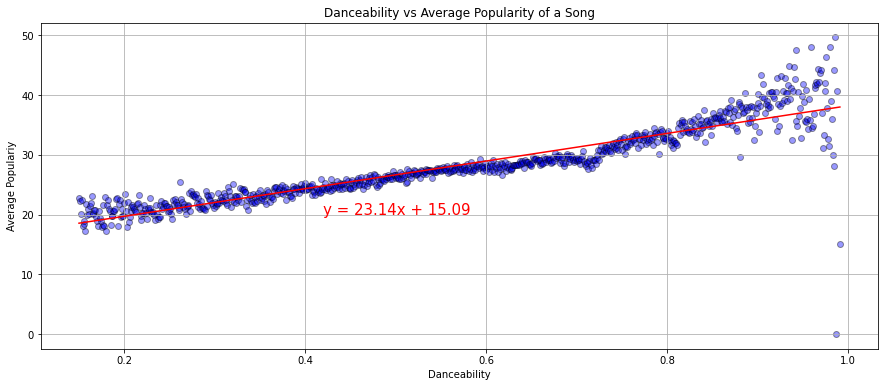

The r-squared is: 0.8339624658522369


In [10]:
plt.figure(figsize=(15,6))

dance_limited = clean_df.loc[clean_df['danceability'] >= 0.15, :]
dance_df = dance_limited.groupby('danceability')


x_values = dance_df['danceability'].mean()
y_values = dance_df['popularity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.42,20),fontsize=15,color="red")
plt.xlabel('Danceability')
plt.ylabel('Average Populariy')
plt.title('Danceability vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
dance_rsquared = (rvalue**2)

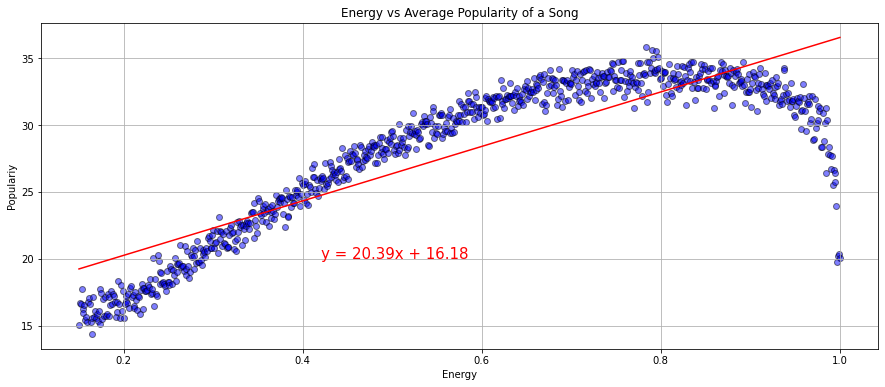

The r-squared is: 0.7406073049954559


In [12]:
plt.figure(figsize=(15,6))

energy_limited = clean_df.loc[clean_df['energy'] >= 0.15, :]
energy_df = energy_limited.groupby('energy')

x_values = energy_df['energy'].mean()
y_values = energy_df['popularity'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.5)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.42,20),fontsize=15,color="red")
plt.xlabel('Energy')
plt.ylabel('Populariy')
plt.title('Energy vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
energy_rsquared = (rvalue**2)

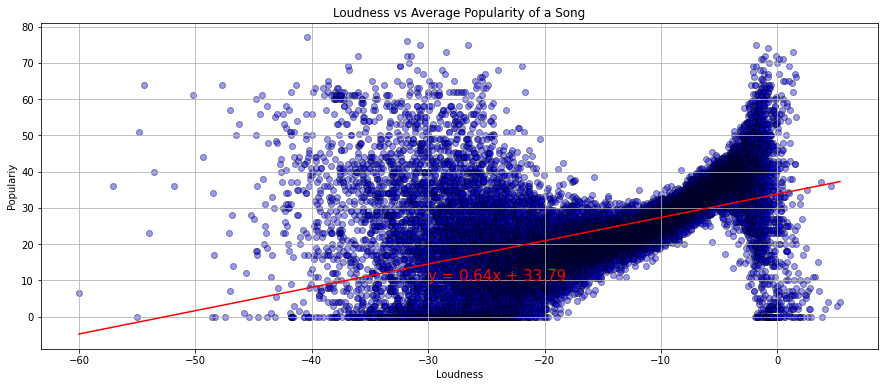

The r-squared is: 0.24846188739076605


In [22]:
plt.figure(figsize=(15,6))
loud_df = clean_df.groupby('loudness')

x_values = loud_df['loudness'].mean()
y_values = loud_df['popularity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,10),fontsize=15,color="red")
plt.xlabel('Loudness')
plt.ylabel('Populariy')
plt.title('Loudness vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
loud_rsquared = (rvalue**2)

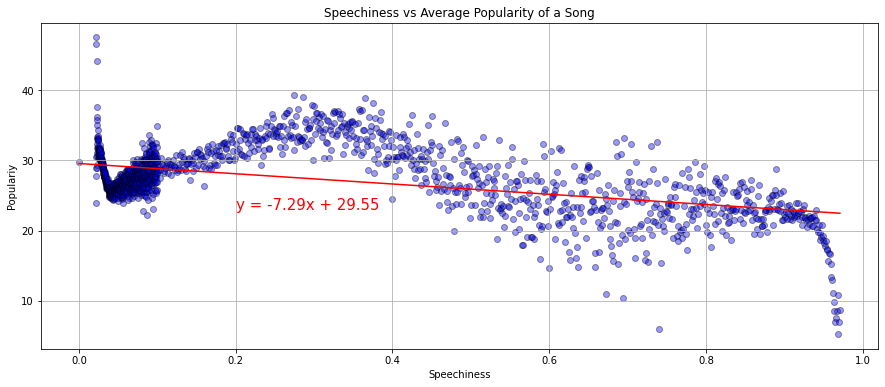

The r-squared is: 0.23293836020616457


In [23]:
plt.figure(figsize=(15,6))
speech_df = clean_df.groupby('speechiness')

x_values = speech_df['speechiness'].mean()
y_values = speech_df['popularity'].mean()
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0.2,23),fontsize=15,color="red")
plt.xlabel('Speechiness')
plt.ylabel('Populariy')
plt.title('Speechiness vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()
print(f"The r-squared is: {rvalue**2}")
speech_rsquared = (rvalue**2)

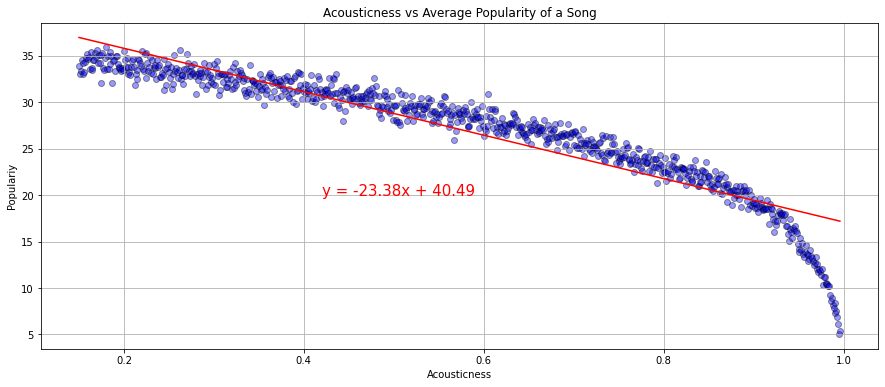

The r-squared is: 0.8687893032342463


In [24]:
plt.figure(figsize=(15,6))

acoustic_limited = clean_df.loc[clean_df['acousticness'] >= 0.15, :]
acoustic_df = acoustic_limited.groupby('acousticness')

x_values = acoustic_df['acousticness'].mean()
y_values = acoustic_df['popularity'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.42,20),fontsize=15,color="red")
plt.xlabel('Acousticness')
plt.ylabel('Populariy')
plt.title('Acousticness vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")
acoustic_rsquared = (rvalue**2)

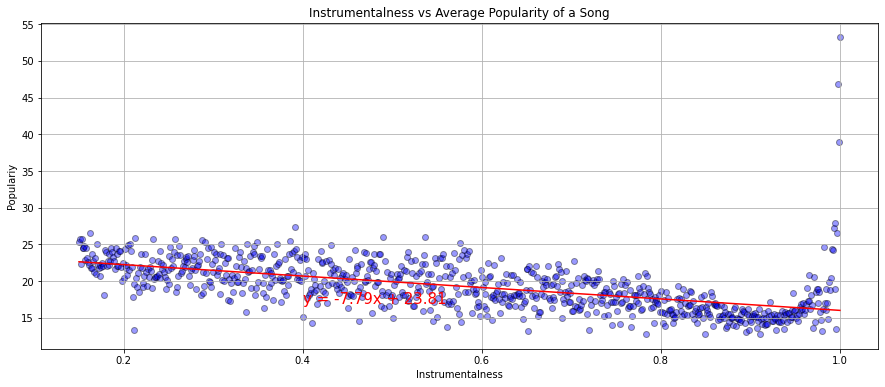

The r-squared is: 0.2986287832203877


In [25]:
plt.figure(figsize=(15,6))

instrument_limited = clean_df.loc[clean_df['instrumentalness'] >= 0.15, :]
instrument_df = instrument_limited.groupby('instrumentalness')

x_values = instrument_df['instrumentalness'].mean()
y_values = instrument_df['popularity'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.4,17),fontsize=15,color="red")
plt.xlabel('Instrumentalness')
plt.ylabel('Populariy')
plt.title('Instrumentalness vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")
instrumental_rsquared = (rvalue**2)

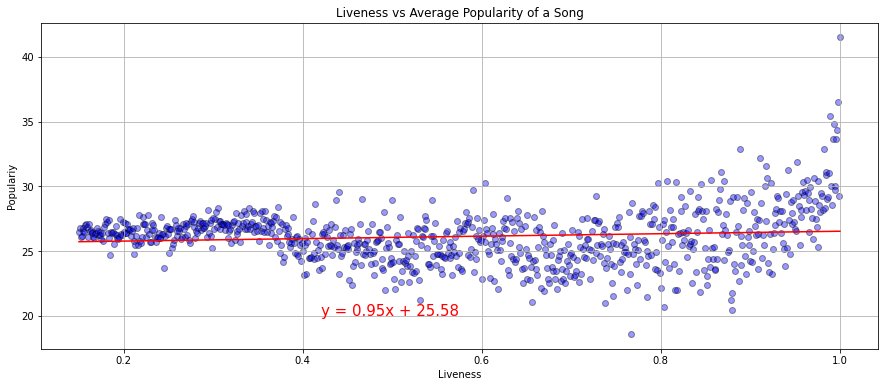

The r-squared is: 0.012526870589009483


In [26]:
plt.figure(figsize=(15,6))

live_limited = clean_df.loc[clean_df['liveness'] >= 0.15, :]
live_df = live_limited.groupby('liveness')

x_values = live_df['liveness'].mean()
y_values = live_df['popularity'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.42,20),fontsize=15,color="red")
plt.xlabel('Liveness')
plt.ylabel('Populariy')
plt.title('Liveness vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")
liveness_rsquared = (rvalue**2)

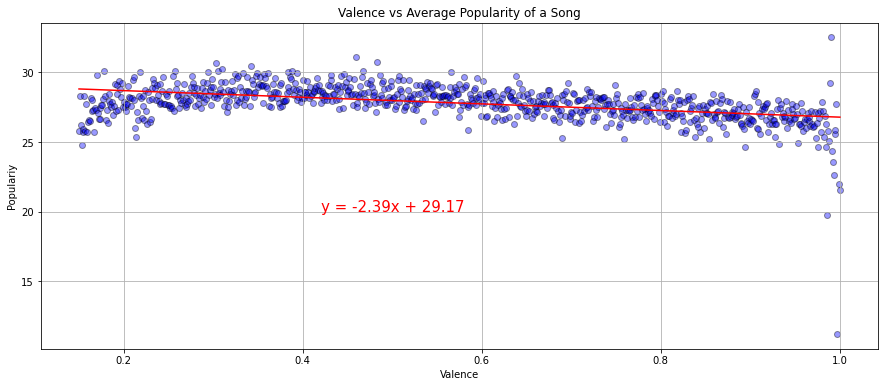

The r-squared is: 0.20417659946062997


In [27]:
plt.figure(figsize=(15,6))

valence_limited = clean_df.loc[clean_df['valence'] >= 0.15, :]
valence_df = valence_limited.groupby('valence')

x_values = valence_df['valence'].mean()
y_values = valence_df['popularity'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(.42,20),fontsize=15,color="red")
plt.xlabel('Valence')
plt.ylabel('Populariy')
plt.title('Valence vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")
valence_rsquared = (rvalue**2)

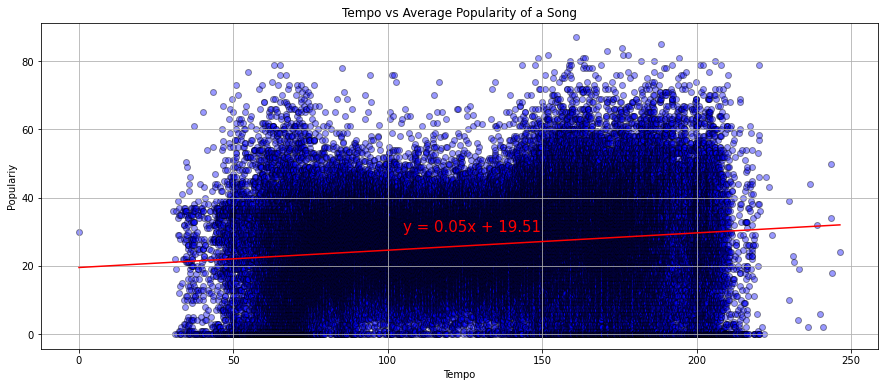

The r-squared is: 0.02738407272147334


In [28]:
plt.figure(figsize=(15,6))

tempo_df = clean_df.groupby('tempo')

x_values = tempo_df['tempo'].mean()
y_values = tempo_df['popularity'].mean()

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values, color='blue', edgecolor='black', alpha=0.4)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(105,30),fontsize=15,color="red")
plt.xlabel('Tempo')
plt.ylabel('Populariy')
plt.title('Tempo vs Average Popularity of a Song')
plt.grid()
#plt.savefig("output_data/Fig5.png")
plt.show()

print(f"The r-squared is: {rvalue**2}")
tempo_rsquared = (rvalue**2)

In [33]:
## What categories best predict popularity? (will be r value closest to 1)
features_rsquared_df = pd.DataFrame({
    "Audio Features": ['Danceability', 'Energy', 'Loudness', 'Speechiness', 'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo'],
    "R-Squared Value": [dance_rsquared, energy_rsquared, loud_rsquared, speech_rsquared, acoustic_rsquared, instrumental_rsquared, liveness_rsquared, valence_rsquared, tempo_rsquared]
})
r_squared_ordered = features_rsquared_df.sort_values(by="R-Squared Value", ascending=False)

r_squared_ordered.reset_index(drop=True)


,Audio Features,R-Squared Value
0,Acousticness,0.868789
1,Danceability,0.833962
2,Energy,0.740607
3,Instrumentalness,0.298629
4,Loudness,0.248462
5,Speechiness,0.232938
6,Valence,0.204177
7,Tempo,0.027384
8,Liveness,0.012527
